In [1]:
import cv2
import numpy as np
from scipy.ndimage import interpolation as inter

In [113]:
# Load the image
image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/text_clear.jpg'
image = cv2.imread(image_path)

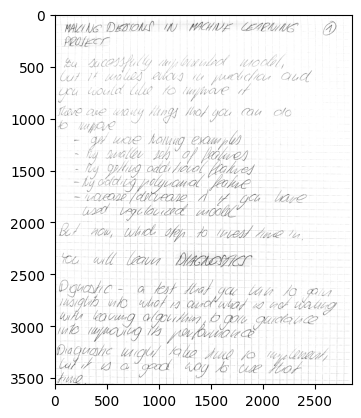

In [114]:
# add the code to first delete the image if it already exists
# if it doesn't exist, then the code will create the image
# if it does exist, the code will overwrite the image
# this is to prevent the image from being saved multiple times
# and taking up unnecessary space
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

#image = cv2.resize(image, (1024, 1024))
# Convert to grayscale
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.imread(image_path,0)








# IMPROVING THE CONTRAST OF THE IMAGE

# Method 1: Histogram Equalization
#gray = cv2.equalizeHist(gray)

# Method 2: CLAHE (Contrast Limited Adaptive Histogram Equalization)
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#clahe_img = clahe.apply(gray)

def adjust_contrast(image, alpha, beta):
    # alpha: contrast control (1.0-3.0)
    # beta: brightness control (0-100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

gray = adjust_contrast(gray, alpha=1.0, beta=10)

#(thresh, img_bin) = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
#gray = 255-img_bin 

#gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,11,2)

# Method 1: Sharpening using the Laplacian filter
def sharpen_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened = cv2.convertScaleAbs(laplacian)
    return sharpened

def sharpen_unsharp_mask(image):
    gaussian_blur = cv2.GaussianBlur(image, (9, 9), 10.0)
    sharpened = cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)
    return sharpened

#gray = sharpen_unsharp_mask(gray)
#gray = sharpen_laplacian(gray)
#ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
#opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))
# Sharpening using the Laplacian filter
#laplacian = cv2.Laplacian(gray, cv2.CV_64F)
#sharpened = cv2.convertScaleAbs(gray)
#equalized = cv2.equalizeHist(gray)

# I would now like to remove grid lines from the image
# I will use the method described in the following link:
# https://stackoverflow.com/questions/46520123/remove-table-lines-from-an-image
# I will use the method described in the following link:
# https://stackoverflow.com/questions/46520123/remove-table-lines-from-an-image

# Save the preprocessed image
preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'
cv2.imwrite(preprocessed_image_path, gray)

#plot the image
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

In [ ]:
### THRESHOLDING (PROGOWANIE) - the process of setting a threshold to separate different regions, such as text and background, in image processing.
### n optical character recognition (OCR) image processing, the operation used to make the written text darker and the background lighter 
### is called binarization. Specifically, the process is often done using a method called thresholding.

### Here’s how it works:
###     Thresholding converts a grayscale image (where pixels have varying intensities) into a binary image (black and white).
###     By choosing a threshold value, any pixel with an intensity above the threshold is set to white 
###       (representing the background), and any pixel below the threshold is set to black (representing the text).

# Perform global thresholding - A single threshold value is applied across the entire image. This is effective if the lighting conditions are consistent across the image.
#ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
#ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
#ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
#ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

# Perform adaptive thresholding - The threshold value is computed locally for different regions of the image. This is useful when there is uneven lighting or varying background conditions.
#thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Perform Otsu's thresholding
#ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform Otsu's thresholding after Gaussian filtering
#blur = cv2.GaussianBlur(gray, (5, 5), 0)
#ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

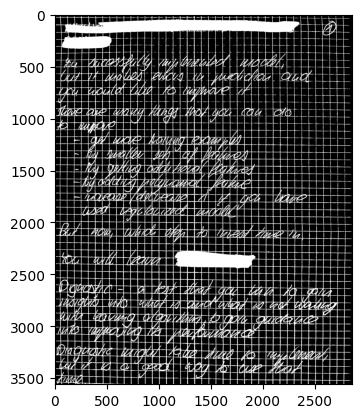

In [104]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Method 1: Global Thresholding
_, gray = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY_INV)


preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

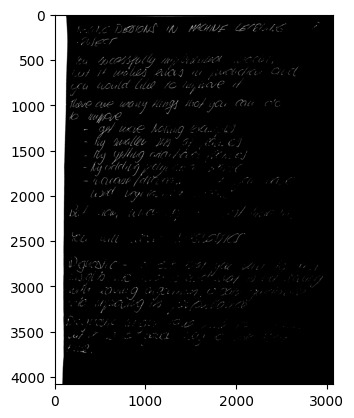

In [22]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Method 1: Global Thresholding
_, gray = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image1.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

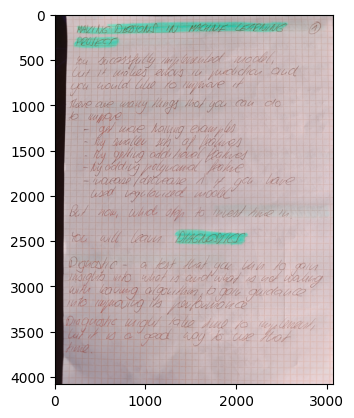

In [4]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image1.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image1.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_COLOR)


preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image1.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

In [116]:
def adjust_contrast_brightness(image, alpha, beta):
    # alpha: contrast control (1.0-3.0)
    # beta: brightness control (0-100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

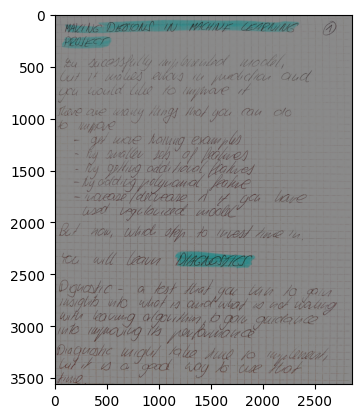

In [135]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Adjust contrast and brightness
alpha = 0.5  # Contrast control (1.0-3.0)
beta = 10   # Brightness control (0-100)
gray = adjust_contrast_brightness(gray, alpha, beta)

preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image1.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

In [111]:
# Defining a kernel length
gray_bin = 255-gray
kernel_length = np.array(gray).shape[1]//200
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(gray_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(gray_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

True

In [19]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path)

# Method 1: Global Thresholding
_, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image1.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1559: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


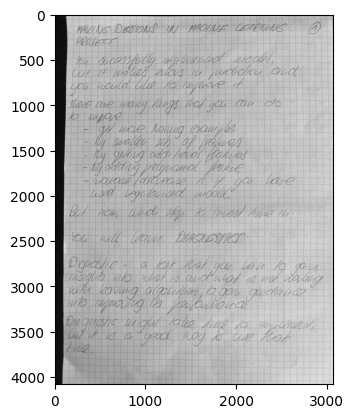

In [15]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

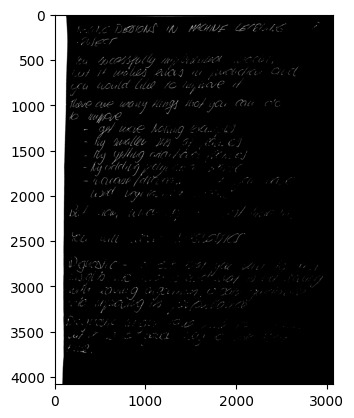

In [17]:
# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
horizontal_lines = cv2.morphologyEx(gray, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
vertical_lines = cv2.morphologyEx(gray, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Combine the results to remove both horizontal and vertical lines
lines = cv2.add(horizontal_lines, vertical_lines)
lines_inv = cv2.bitwise_not(lines)



plt.imshow(gray, cmap='gray')
#inpainted = cv2.inpaint(gray, lines_inv, 3, cv2.INPAINT_TELEA)
#plt.imshow(inpainted, cmap='gray')

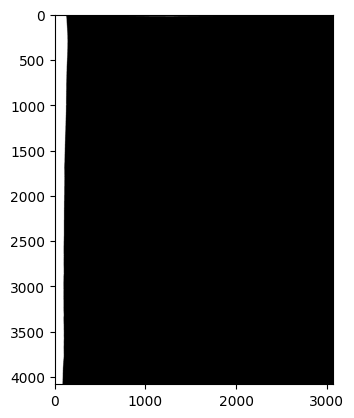

In [18]:
plt.imshow(lines, cmap='gray')

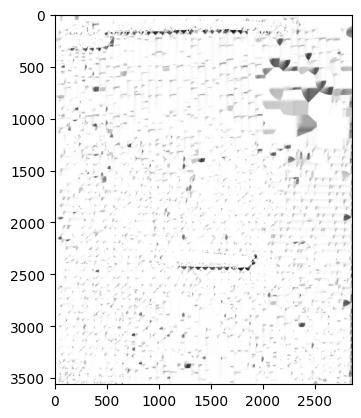

In [98]:
# Inpainting to remove the lines
gray_test = cv2.inpaint(gray, lines_inv, 11, cv2.INPAINT_NS)
plt.imshow(gray_test, cmap='gray')


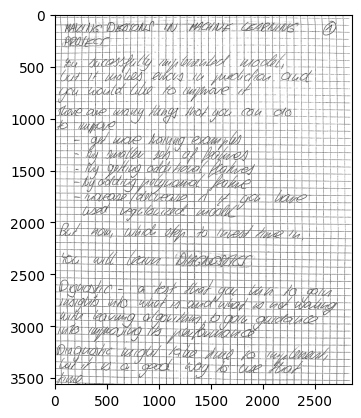

In [76]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Method 2: Adaptive Thresholding
#gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

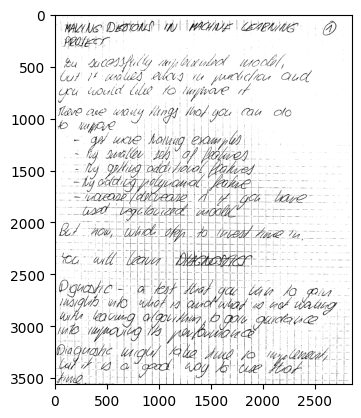

In [79]:
import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Method 3: Otsu's Thresholding
_, gray = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')

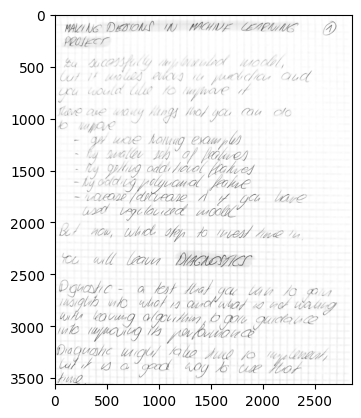

In [80]:
### DENOISING

import os
if os.path.exists('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'):
    os.remove('C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg')

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

gray = cv2.fastNlMeansDenoising(gray, None, h=50, templateWindowSize=11, searchWindowSize=21)

preprocessed_image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/preprocessed_image.jpg'
cv2.imwrite(preprocessed_image_path, gray)
import matplotlib.pyplot as plt
plt.imshow(gray, cmap='gray')